# Assignment 1
* **Polycarpa aurata** = marine invertebrate animal
* **Neopomacentrus cyanomos** = is a fish native to the Indo-Pacific region from the Persian Gulf
* **Acipenser sturio** = uno dei più grandi pesci d'acqua dolce e salmastra diffusi in Europa
* **Homo Sapiens** = uomo
* **Pan paniscus** = primate della famiglia degli ominidi
* **Nerita litterata** = Mollusks
* **Maxima clam** = species of bivalve mollusc found throughout the Indo-Pacific region
* **Gymnodoris ceylonica** = Gymnodoris ceylonica è un mollusco nudibranco  (lumaca di mare)
* **Bufo bufo** = rospo comune
* **Notophthalmus viridescens** = common newt (salamander) of eastern North America
* **Amphiprion ocellaris** = pesce pagliaccio occidentale
* **Tetrao urogallus** = gallo cedrone
* **Dromaius novaehollandiae** = emù
* **Fukomys mechowii** = is a species of rodent (roditori)

#### NCBI Query about COI gene
*name* AND COI

#### Bio info
* **complete CDS"** means the presence of a start codon "ATG" and a stop codon "TAA/TGA/TAG"
* **"5-partial"** means there's a stop codon but no start codon
* **"3-partial"** which is quite rare means the stop codon is missing+
* **GENE COI = cytochrome oxidase subunit I**

## Libraries

In [11]:
from Bio import SeqIO
from datetime import datetime
import os
from matplotlib import pyplot as plt
import pandas as pd
from pprint import pprint
import statistics
import geopandas as gpd
import numpy as np
import mapclassify as mc

pd.set_option('display.max_rows', 180)
pd.options.mode.chained_assignment = None 

## Function

In [12]:
starting_path = os.getcwd()
plt.style.use('seaborn')

def x_and_y_for_line_num_plot(index, specie):
    df = pd.DataFrame(columns=['year'])
    for record in index[specie]:
        year = record.annotations['date'].split('-')[2]
        df = df.append({'year': year}, ignore_index = True)
        
    values = df['year'].value_counts()
    values.sort_index(ascending=True, inplace=True)

    years = list(values._index)
    nums = list(values)

    years.sort()

    return years, nums
    

def define_working_directory():
    genbank_path = os.path.join(starting_path, 'data/genBank/')
    os.chdir(genbank_path)
    
def get_all_files():
    return [filename for filename in os.listdir(os.getcwd())]

def save_img(title):    
    plt.savefig('./analysis_images/'+title+'.png', dpi = 300, quality = 95, format = 'png', pad_inches = 500)

def create_index(list_of_genBank):
    index = dict()
    for species in list_of_genBank:
        specie = species.split('.')[0]
        index[specie] = list(SeqIO.parse(species, "genbank"))
    return index

def plot_num_of_file(index):
    num_of_file = []
    species = []
    avg_file = 0
    
    for specie in index:
        species.append(specie)
        num_of_file.append(len(index[specie]))
    
    fig, ax = plt.subplots()
    
    ax.barh(species, num_of_file)
    
    for i, v in enumerate(num_of_file):
        ax.text(v, i - .05, str(v), color='black', fontweight='bold', ha='left')
        
    ax.set_xlabel('Number of genBank')
    plt.title('Comparison of GenBank number about COI gene')
    plt.xscale('log')

    ax.grid(True)
    plt.subplots_adjust(left=0.25)
    save_img('Number_of_GenBank_for_all_Species')
    plt.show()
    
def plot_num_of_final_for_year(index, specie):
    
    years, nums = x_and_y_for_line_num_plot(index, specie)
    
    fig, ax = plt.subplots()
    ax.plot(years, nums, color='black', marker='o', label=specie)
    
    ax.legend()
    ax.set_title('Number of GenBank for Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('Numbers')
    save_img('Number_of_final_GenBank_for_year_'+specie)
    
    plt.show()
    
def plot_num_match(index):
    
    homo_years, homo_nums = x_and_y_for_line_num_plot(index, 'homo_sapiens') 
    tri_years, tri_nums = x_and_y_for_line_num_plot(index, 'tridacna_maxima') 
    neo_years, neo_nums = x_and_y_for_line_num_plot(index, 'neopomacentrus_cyanomos') 

    fig, ax = plt.subplots()
    
    ax.plot(homo_years[6:], homo_nums[6:], marker='o', label='Homo Sapiens')

    ax.plot(tri_years, tri_nums, marker='X', label='Tridacna Maxima')
    ax.plot(neo_years, neo_nums, marker='*', label='Neopomacentrus Cyanomos')
    
    ax.legend()
    ax.set_title('Comparison among first three species for numbers of GenBank')
    ax.set_xlabel('Year')
    ax.set_ylabel('Numbers')
    
    save_img('Comparison_among_top_3_final_gen')
    
    plt.show()    
    
def plot_seq_avg_length(index):
    gene = ['COI', 'COX1', 'CO1', 'MT-CO1']
    avg_lenght = []
    error = []
    species = []
    max_value = []
    min_value = []

    values = []

    out = []

    for specie in ['homo_sapiens', 'tridacna_maxima', 'neopomacentrus_cyanomos']:
        species.append(specie)
        for genBank in index[specie]:
            for feature in genBank.features:
                if feature.type == "CDS":
                    if 'gene' in feature.qualifiers: 
                        if feature.qualifiers['gene'][0] in gene and 'translation' in feature.qualifiers:
                            values.append(len(feature.qualifiers['translation'][0])*3)
                            if len(feature.qualifiers['translation'][0])*3 == 1572:
                                pass
                                # print(genBank)
                            if len(feature.qualifiers['translation'][0])*3 == 90:
                                pass
                                # print(genBank)
                    elif 'note' in feature.qualifiers:
                        if feature.qualifiers['note'][0] in gene and 'translation' in feature.qualifiers:
                            values.append(len(feature.qualifiers['translation'][0])*3)


        error.append(statistics.stdev(values))
        max_value.append(max(values))
        min_value.append(min(values))
        avg_lenght.append(sum(values)/len(values))
        values = []
     
    fig, ax = plt.subplots()
    
    ax.barh(species, avg_lenght, xerr = error)
    
    for i, (num, std) in enumerate(zip(avg_lenght, error)):
        ax.text(num + 2, i - .15, '  AVG: ' + str(round(num, 2)), color='black', ha='left', fontweight='bold')
        ax.text(num + 2, i + .15, '  STD: ' + str(round(std, 2)), color='black', ha='left', fontweight='bold')
        ax.text(num, i - .15, 'MAX: ' + str(max_value[i]), color = 'black', ha='right', fontweight='bold')
        ax.text(num, i + .15, 'MIN: ' + str(min_value[i]), color = 'black', ha='right', fontweight='bold')
        
        
        
    ax.set_xlabel('Number of bases')
    plt.title('Comparison among first three species about length of COI sequence')

    ax.grid(True)
    plt.subplots_adjust(left=0.25)
    save_img('Comparison_among_top_3_avg_COI_length')
    plt.show()
    
def plot_num_on_the_world(index, specie):
    shapefile = './data/world_map/ne_110m_admin_0_countries.shp'
    gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
    gdf.columns = ['country', 'country_code', 'geometry']
    gdf.set_index('country', inplace = True)
    
    total = [0]*gdf.shape[0]
    for genBank in index[specie]:
        for feature in genBank.features:
            if feature.type == 'source':
                if 'country' in feature.qualifiers:
                    country = feature.qualifiers['country'][0].split(':')[0]

                    if country == "Cote d'Ivoire":
                        total[gdf.index.get_loc('Canada')] += 1
                    elif country == "Hong Kong":
                        total[gdf.index.get_loc('China')] += 1
                    elif country == "Viet Nam":
                        total[gdf.index.get_loc('Vietnam')] += 1
                    elif country == "Tanzania":
                        total[gdf.index.get_loc('United Republic of Tanzania')] += 1                 
                    elif country == "Czech Republic":
                        total[gdf.index.get_loc('Czechia')] += 1   
                    elif country == "USA":
                        total[gdf.index.get_loc('United States of America')] += 1   
                    elif country == "Kiribati" or country == 'Atlantic Ocean' or country == 'Pacific Ocean':
                        pass
                    else:
                        total[gdf.index.get_loc(country)] += 1  

    for i in range (0, len(total)):
        if total[i] > 0:
            total[i] = np.log(total[i])
        
    gdf['values'] = total
    
    fig, ax1 = plt.subplots(figsize=(15, 10))

    ax1.set_axis_off()
    ax1.set_title("GenBank per Country for "+ specie)

    gdf.plot(column='values', ax = ax1, legend = True, linewidth=1, alpha=0.8, cmap = "Oranges",
             legend_kwds={'label': 'ln(number) of GenBank'}, edgecolor = "black")


    plt.axis('equal')
    save_img('Plot_num_on_the_world_'+specie)
    plt.show()
      

## Main

In [8]:
define_working_directory()
files = get_all_files()
index_of_gb =  create_index(files)
os.chdir(starting_path)

# Analysis

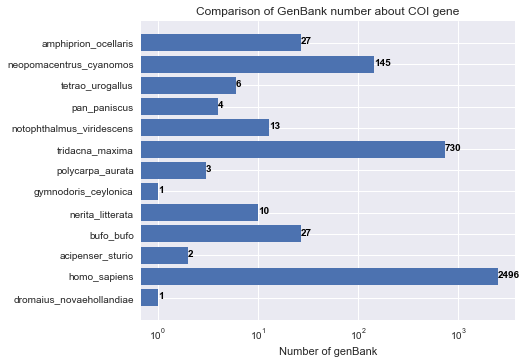

In [10]:
plot_num_of_file(index_of_gb)

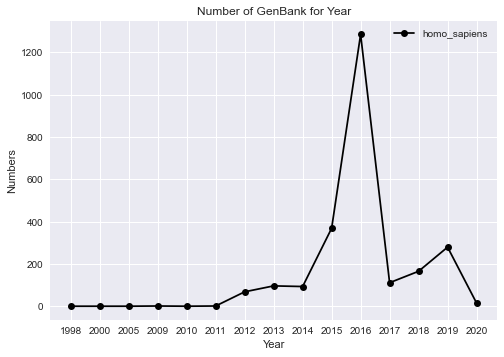

In [194]:
plot_num_for_year(index_of_gb, 'homo_sapiens')

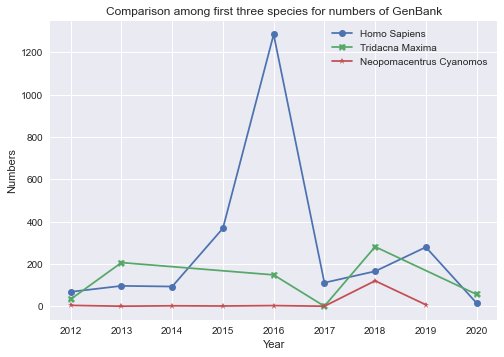

In [195]:
plot_num_match(index_of_gb)

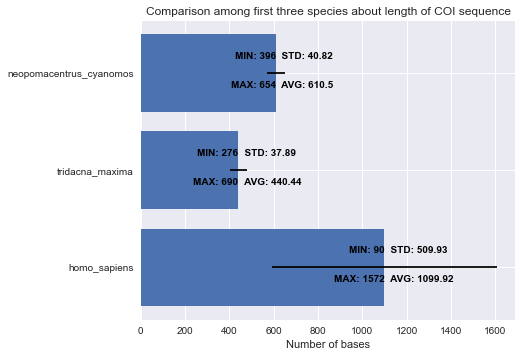

In [338]:
plot_seq_avg_length(index_of_gb)

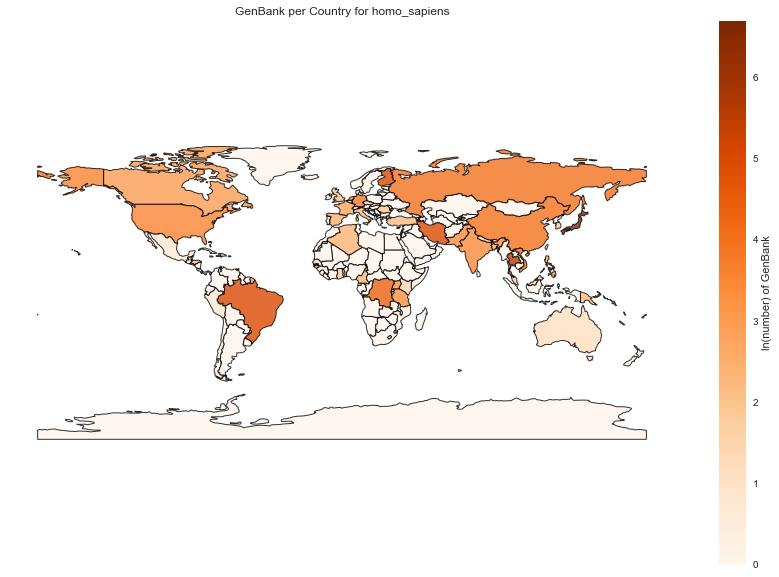

In [335]:
plot_num_on_the_world(index_of_gb, 'homo_sapiens')